'/Users/yoon/Desktop/School/UCD/ECS_174_cv/cv/images/car.jpg'

In [1]:
import cv2
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt

# Edge Detection

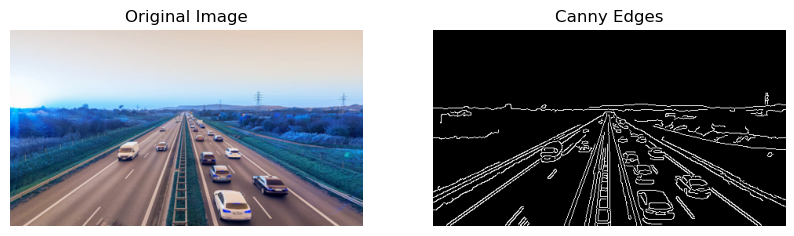

In [2]:
image = Image.open('images/car3.jpg')

image = image.resize((450, 250))
image_arr = np.array(image)

# Convert the image to grayscale
gray = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Plot the original image and the edges detected
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.show()

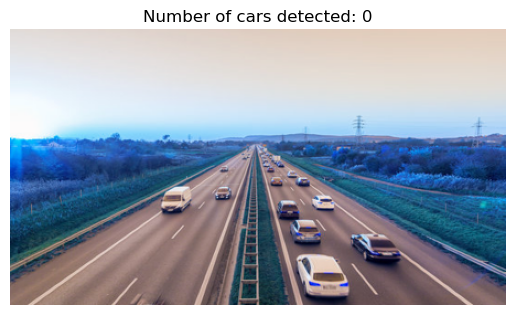

In [3]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours and draw bounding boxes
car_count = 0
for contour in contours:
    # Approximate the contour to reduce the number of points
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    
    # Bounding box of the contour
    x, y, w, h = cv2.boundingRect(approx)
    
    # Filter by size and aspect ratio
    aspect_ratio = w / float(h)
    if 2 < aspect_ratio < 5 and 1000 < cv2.contourArea(contour) < 5000:
        car_count += 1
        cv2.rectangle(image_arr, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the final image with car detections
plt.imshow(cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Number of cars detected: {car_count}")
plt.show()

# Background Subtraction

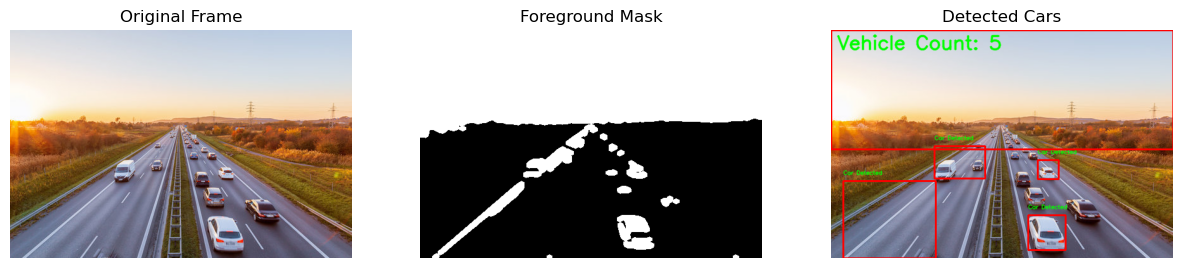

Total Vehicles Detected: 5


In [4]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = None

image_path = 'images/car3.jpg'
frame = cv2.imread(image_path)

# Apply the background object on the frame to get the segmented mask. 
# Convert image to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to remove noise
blur = cv2.GaussianBlur(gray, (11, 11), 0)

# Perform thresholding to get rid of the shadows.
_, fgmask = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)

# Apply some morphological operations to make sure you have a good mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
fgmask = cv2.erode(fgmask, kernel, iterations = 1)
fgmask = cv2.dilate(fgmask, kernel, iterations = 2)

# Detect contours in the frame.
contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the frame to draw bounding boxes around the detected cars.
frameCopy = frame.copy()

# Initialize vehicle count
vehicle_count = 0
# loop over each contour found in the frame.
for cnt in contours:
	
	# Make sure the contour area is somewhat higher than some threshold to make sure its a car and not some noise.
	if cv2.contourArea(cnt) > 400:
		
		# Retrieve the bounding box coordinates from the contour.
		x, y, width, height = cv2.boundingRect(cnt)
		
		# Draw a bounding box around the car.
		cv2.rectangle(frameCopy, (x , y), (x + width, y + height),(0, 0, 255), 2)
		
		# Write Car Detected near the bounding box drawn.
		cv2.putText(frameCopy, 'Car Detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0), 1, cv2.LINE_AA)
		vehicle_count += 1

# Add vehicle count to the image
cv2.putText(frameCopy, f'Vehicle Count: {vehicle_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Convert images to RGB (for displaying with matplotlib)
frame_rgb = cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB)
fgmask_rgb = cv2.cvtColor(fgmask, cv2.COLOR_GRAY2RGB)

# Display the original frame, mask, and final result using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(fgmask_rgb)
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(frame_rgb)
plt.title('Detected Cars')
plt.axis('off')

plt.show()

print(f'Total Vehicles Detected: {vehicle_count}')